## PyMongo 

PyMongo is a Python distribution containing tools for working with MongoDB, and is the recommended way to work with MongoDB from Python. This documentation attempts to explain everything you need to know to use PyMongo.

https://pymongo.readthedocs.io/en/stable/index.html

### Installing with pip

pip install pymongo

In [ ]:
# run this code to install in this current environtment
!pip install pymongo==4.3.3

### Making a Connection with MongoClient

The first step when working with PyMongo is to create a MongoClient to the running mongod instance. Doing so is easy:

In [ ]:
from pymongo import MongoClient # import the pymongo
client = MongoClient() # connect on the default host and port which is localhost:27017

Or use the **MongoDB URI** format:

In [ ]:
from pymongo import MongoClient # import the pymongo
client = MongoClient("mongodb://localhost:27017/") # connect on the "localhost" host and port 27017

### Getting a Database

A single instance of MongoDB can support multiple independent databases. When working with PyMongo you access databases using attribute style access on MongoClient instances:

In [ ]:
db = client.test_database

If your database name is such that using attribute style access won’t work (like test-database), you can use dictionary style access instead:

In [ ]:
db = client['test-db-week9-1']

### Getting a Collection

A collection is a group of documents stored in MongoDB, and can be thought of as roughly the equivalent of a table in a relational database. Getting a collection in PyMongo works the same as getting a database:

In [ ]:
collection = db.test_collection

or (using dictionary style access):

In [ ]:
collection = db['test-collection']

**Notes:** An important note about collections (and databases) in MongoDB is that they are created lazily - none of the above commands have actually performed any operations on the MongoDB server. Collections and databases are created when the first document is inserted into them.



### Documents

Data in MongoDB is represented (and stored) using JSON-style documents. In PyMongo we use dictionaries to represent documents. As an example, the following dictionary might be used to represent a blog post:

In [ ]:
import datetime #import datetime to generate datetime automatically

# define one dictionary data ("key": value)
post = {
    "author": "Mike",
    "title": "My first blog post!",
    "tags": ["mongodb", "python", "pymongo"],
    "created": datetime.datetime.utcnow()
    }

Note that documents can contain native Python types (like datetime.datetime instances) which will be automatically converted to and from the appropriate BSON types.

#### Inserting a Document

To insert a (one) document into a collection we can use the `insert_one()` method:



In [ ]:
posts = db.posts # use "posts" collection
post_id = posts.insert_one(post).inserted_id #insert the post data and return the _id (object id)
print(post_id)

When a document is inserted a special key, "_id", is automatically added if the document doesn’t already contain an "_id" key. The value of "_id" must be unique across the collection. insert_one() returns an instance of InsertOneResult. For more information on "_id", see the documentation on _id.

### Insert Multiple Documents

To insert multiple documents into a collection in MongoDB, we use the insert_many() method.

The first parameter of the insert_many() method is a list containing dictionaries with the data you want to insert:

In [ ]:
authors = db.authors # create/use authors collection

# authors list consist of dictionary
author_list = [
  { "name": "Amy", "address": "Apple st 652"},
  { "name": "Hannah", "address": "Mountain 21"},
  { "name": "Michael", "address": "Valley 345"},
  { "name": "Sandy", "address": "Ocean blvd 2"}
]

# insert all data
x = authors.insert_many(author_list)

#print list of the _id values of the inserted documents:
print(x.inserted_ids)

The insert_many() method returns a InsertManyResult object, which has a property, inserted_ids, that holds the ids of the inserted documents.

#### Getting a Single Document With find_one()

The most basic type of query that can be performed in MongoDB is find_one(). This method returns a single document matching a query (or None if there are no matches). It is useful when you know there is only one matching document, or are only interested in the first match. Here we use find_one() to get the first document from the posts collection:

In [ ]:
posts.find_one() # show only one document (here without filter)

The result is a dictionary matching the one that we inserted previously.

Note The returned document contains an "_id", which was automatically added on insert.

find_one() also supports querying on specific elements that the resulting document must match. To limit our results to a document with author “Mike” we do:


In [ ]:
search_filter = {"author": "Mike"} # author is key and "Mike" is the query we want to search
posts.find_one(search_filter)

If we try with a different author, like “John”, we’ll get no result:



In [ ]:
search_filter = {"author": "John"} # author is key and "Mike" is the query we want to search
posts.find_one(search_filter)

#### Querying By ObjectId

We can also find a post by its _id, which in our example is an ObjectId. 
Note that an ObjectId is not the same as its string representation.
A common task in web applications is to get an ObjectId from the request URL and find the matching document. It’s necessary in this case to convert the ObjectId from a string before passing it to find_one:



In [ ]:
from bson.objectid import ObjectId #import this to convert ObjectID from string to it's datatype in MongoDB

post_id = "66304134fe0d05ff43bc745e" #change this with _id from Mike above

# Convert from string to ObjectId:
post_id_converted = ObjectId(post_id)

search_filter = {"_id": post_id_converted} # _id is key and post_id_converted is the converted _id
posts.find_one(search_filter)

### Find All

To select data from a table in MongoDB, we can also use the find() method.

The find() method returns all occurrences in the selection.

The first parameter of the find() method is a query object. In this example we use an empty query object, which selects all documents in the collection.

In [ ]:
authors = db.authors # create/use authors collection

# get all authors data
all_authors = authors.find()

#print (iterate) the author data one by one
for author in all_authors:
  print(author)

### Filter the Result

When finding documents in a collection, you can filter the result by using a query object.

The first argument of the find() method is a query object, and is used to limit the search.

In [ ]:
authors = db.authors # create/use authors collection

# get all authors data with query
myquery = { "name": "Amy" }
all_authors = authors.find(myquery)

#print (iterate) the author data one by one
for author in all_authors:
  print(author)

### Filter With Regular Expressions
You can also use regular expressions as a modifier.

Regular expressions can only be used to query strings.

To find only the documents where the "name" field contains with the word "an", use the regular expression { "$regex": 'an', "$options" :'i'}

In [ ]:
authors = db.authors # create/use authors collection

# get all authors data with query
search_word = "an" # search word
myquery = { 
  "name": {
    "$regex": search_word, 
    "$options" :'i' # case-insensitive
    }
  }

# run the query and store the result into all_authors
all_authors = authors.find(myquery)

#print (iterate) the author data one by one
for author in all_authors:
  print(author)

### Sort the Result

Use the sort() method to sort the result in ascending or descending order.

The sort() method takes one parameter for "fieldname" and one parameter for "direction" (ascending is the default direction).

Sort Descending: Use the value -1 as the second parameter to sort descending. While 1 is for ascending.

In [ ]:
authors = db.authors # create/use authors collection

# get all authors data with query sort descending by name
all_authors = authors.find().sort("name", -1)

#print (iterate) the author data one by one
for author in all_authors:
  print(author)

### Delete Document

To delete one document, we use the delete_one() method.

The first parameter of the delete_one() method is a query object defining which document to delete.

**Note: If the query finds more than one document, only the first occurrence is deleted.**

In [ ]:
authors = db.authors # create/use authors collection

# get all authors data with query
myquery = { "name": "Amy" }

# delete one match/found document
x = authors.delete_one(myquery)

print(x.deleted_count, " documents deleted.")

### Delete Many Documents

To delete more than one document, use the delete_many() method.

The first parameter of the delete_many() method is a query object defining which documents to delete.

In [ ]:
authors = db.authors # create/use authors collection

# Delete all documents where the name contains "an" letter:
search_word = "an" # search word
myquery = { 
  "name": {
    "$regex": search_word, 
    "$options" :'i' # case-insensitive
    }
  }

# run the query to delete all matched authors
x = authors.delete_many(myquery)

print(x.deleted_count, " documents deleted.")

### Update Collection

ou can update a record, or document as it is called in MongoDB, by using the update_one() method.

The first parameter of the update_one() method is a query object defining which document to update.

Note: If the query finds more than one record, only the first occurrence is updated.

The second parameter is an object defining the new values of the document.

In [ ]:
authors = db.authors # create/use authors collection

# Update based on name = "Michael"
myquery = { "name": "Michael" }

# Change the address from "Valley 345" to "Seoul 2023":
newvalues = { "$set": { "address": "Seoul 2023" } }

# run the query to update one matched authors
authors.update_one(myquery, newvalues)

#print "authors" after the update:
for x in authors.find():
  print(x)

### Update Many

To update all documents that meets the criteria of the query, use the update_many() method.

In [ ]:
authors = db.authors # create/use authors collection

# Update all documents where the name contains "a" letter:
search_word = "a" # search word
myquery = { 
  "name": {
    "$regex": search_word, 
    "$options" :'i' # case-insensitive
    }
  }

newvalues = { "$set": { "name": "Minnie" } }

# run the query to update all matched authors
x = authors.update_many(myquery, newvalues)

print(x.modified_count, " documents updated.")

## Flask-Example

Head over to `webapp/app.py`

- Import all the necessary packages/modules/functions
- connect to mongodb database: mongodb://localhost:27017/
- use/create "week9" database
- use/create "projects" collection

In [ ]:
from flask import Flask, render_template
from pymongo import MongoClient # import the pymongo
from bson.objectid import ObjectId #import this to convert ObjectID from string to it's datatype in MongoDB

client = MongoClient("mongodb://localhost:27017/") # connect on the "localhost" host and port 27017
db = client["week9"] # use/create "week9" database
projects = db.projects # use/create "projects" collection

# Create the Flask application
app = Flask(__name__)

- Create a route `/` with bound to function `index()`
- get all project data
- convert it to list
- pass the data into `home.html` template (file is resided in the `templates` folder)

In [ ]:
@app.route('/')
def index():
    all_projects = projects.find() # get all projects data
    all_projects_list = list(all_projects) # convert the data into list

    return render_template("home.html", data=all_projects_list)

- Create a route `/project_detail/<id>` with bound to function `project_detail(id)` with received id as an input argument
- convert the id into `ObjectID`
- construct search filter
- find_one used to only show one matched data
- pass the data into `project-detail.html` template (file is resided in the `templates` folder)

In [ ]:
@app.route('/project_detail/<id>')
def project_detail(id):
    # Convert from string to ObjectId:
    _id_converted = ObjectId(id)
    search_filter = {"_id": _id_converted} # _id is key and _id_converted is the converted _id
    project_data = projects.find_one(search_filter) # get one project data matched with _id
    
    return render_template("project-detail.html", data=project_data)

put the following code at the end of 'app.py' script so that we can run the python file independently

In [ ]:
# put the following code at the end of 'app.py' script
if __name__ == '__main__':
    app.run(debug=True) #debug is True, default host and port is 127.0.0.1:5000

# Assignment#4:
- Create a new route `/students` and list out all the students from database
- When we click the student with route `/students/grade_detail/<id>`, show his/her full grade score and letter
- Grade letter is automatically assigned/converted from grade (Score) in the template (front-end) or flask (back-end) using rule (if or case)
- Student grade table/collection as follow:

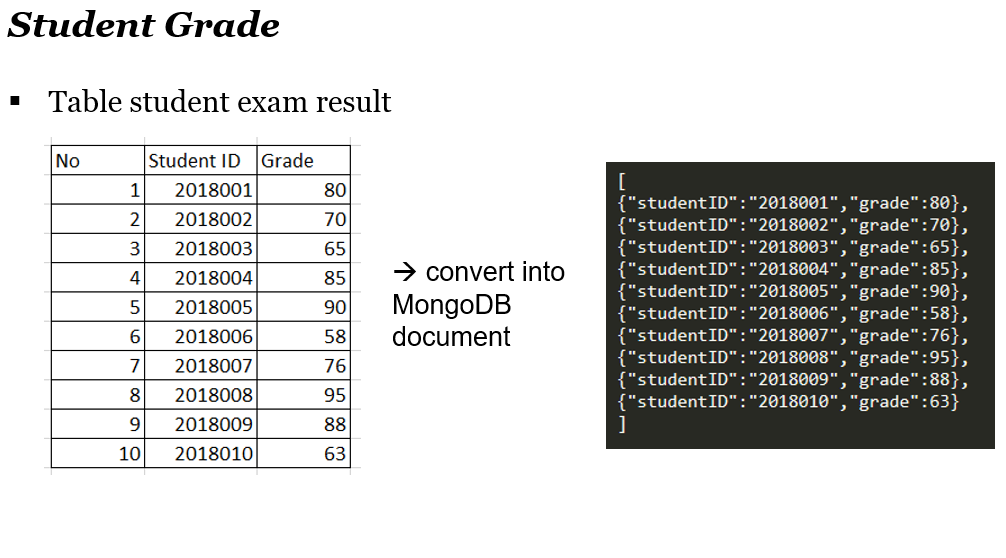




Use the following reference on how to store the data into mongodb database using Python code

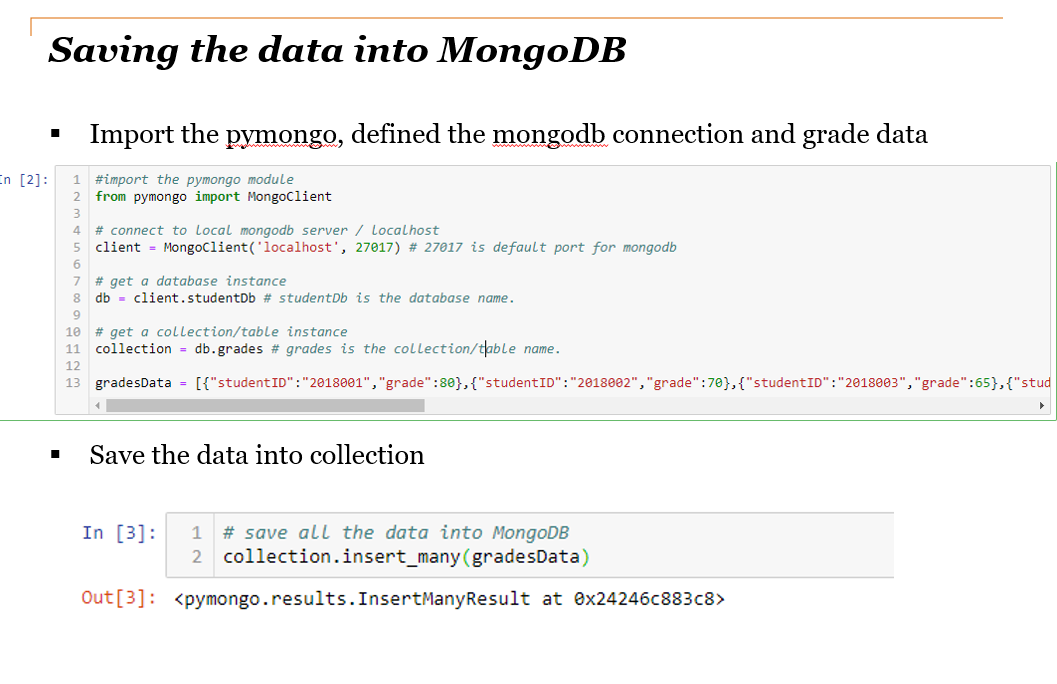

You can check the inserted data using the following code:
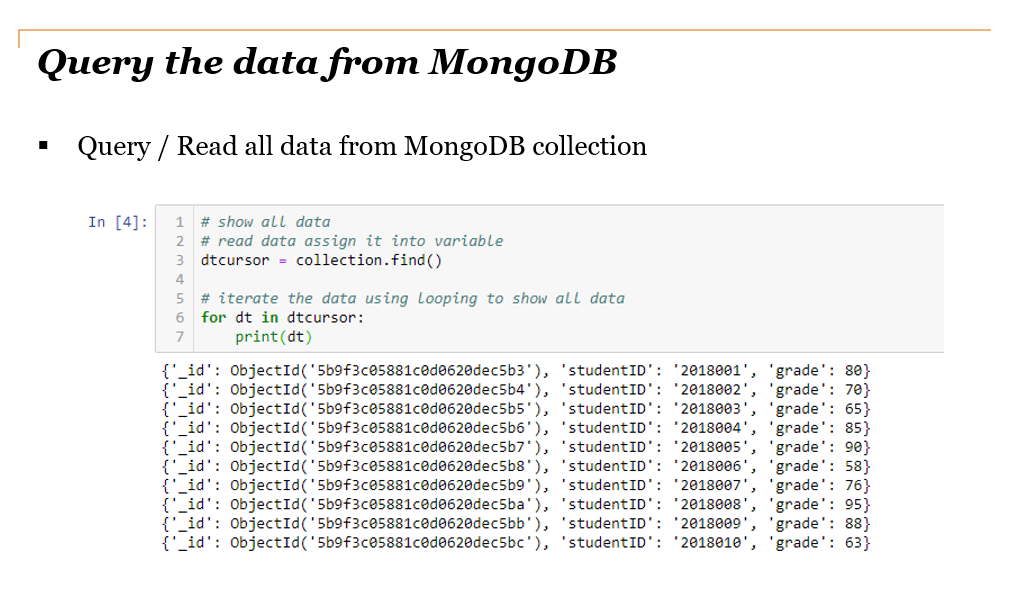

**Note that _id field would be different (unique) from yours so just ignore it**

Make a function to change the grade score into grade letter:
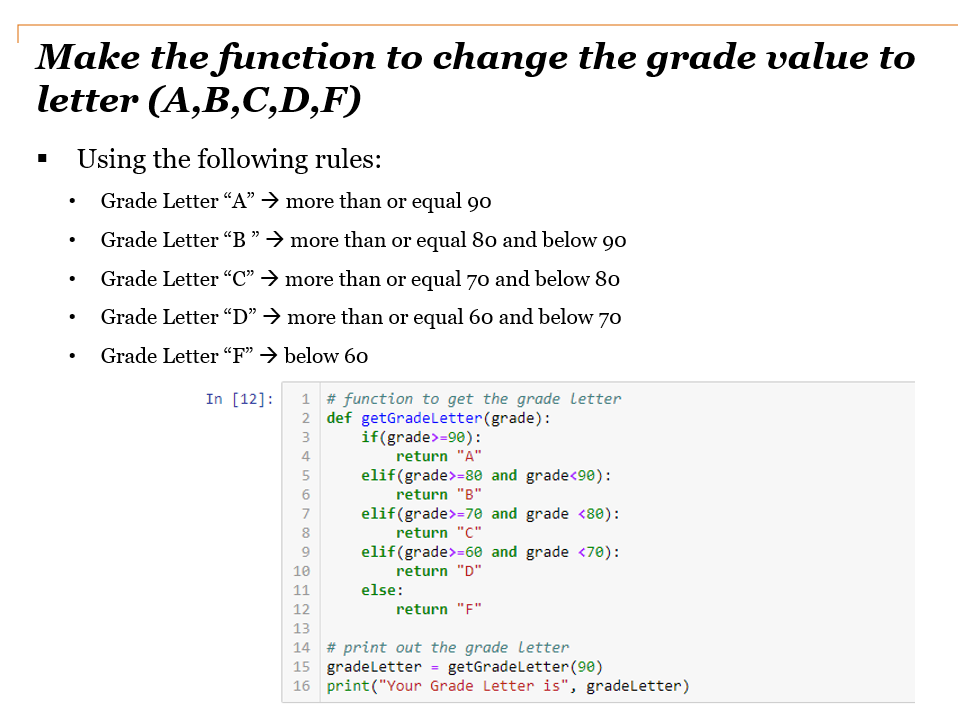

Update the grade table and add new field called "letter" and assigned based on the grade score for all students:

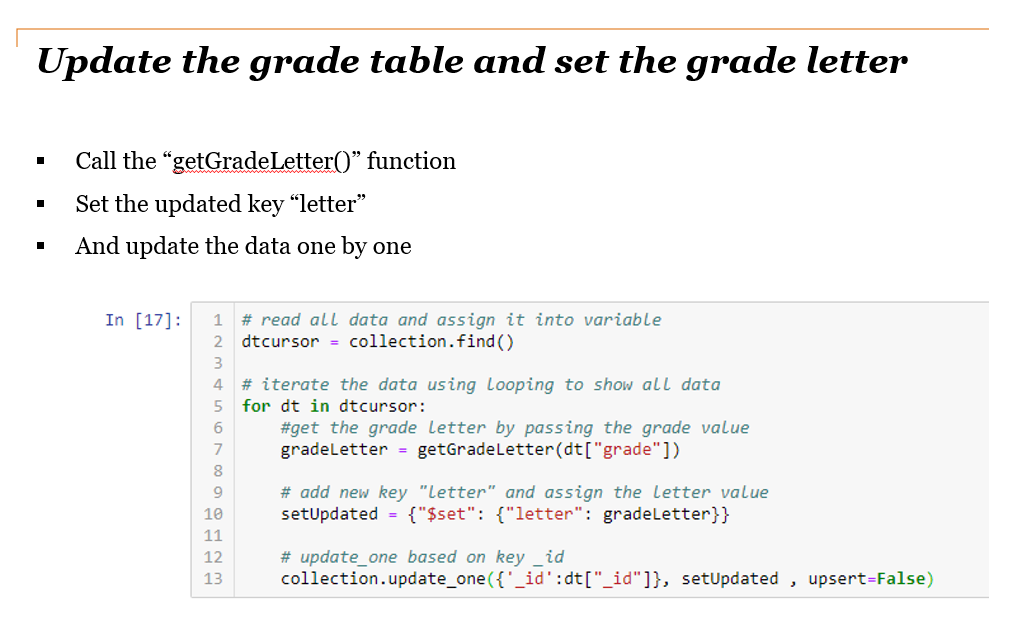

### Create a Flask webapp and show the grade data like this:
- **List of students**

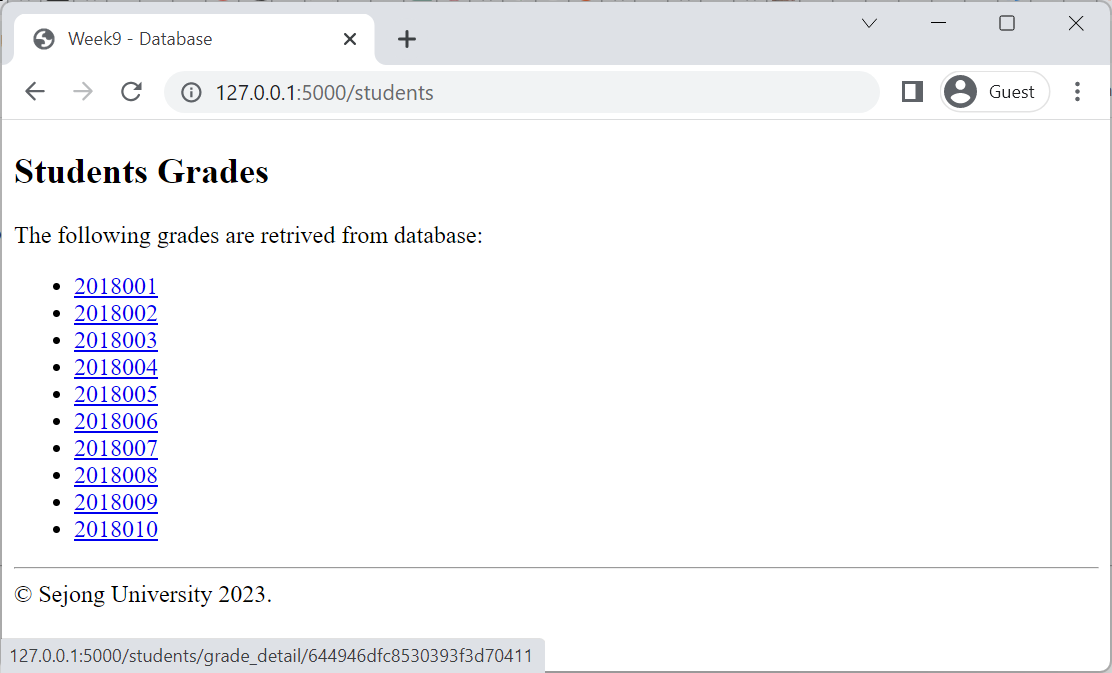


- **Detail student**

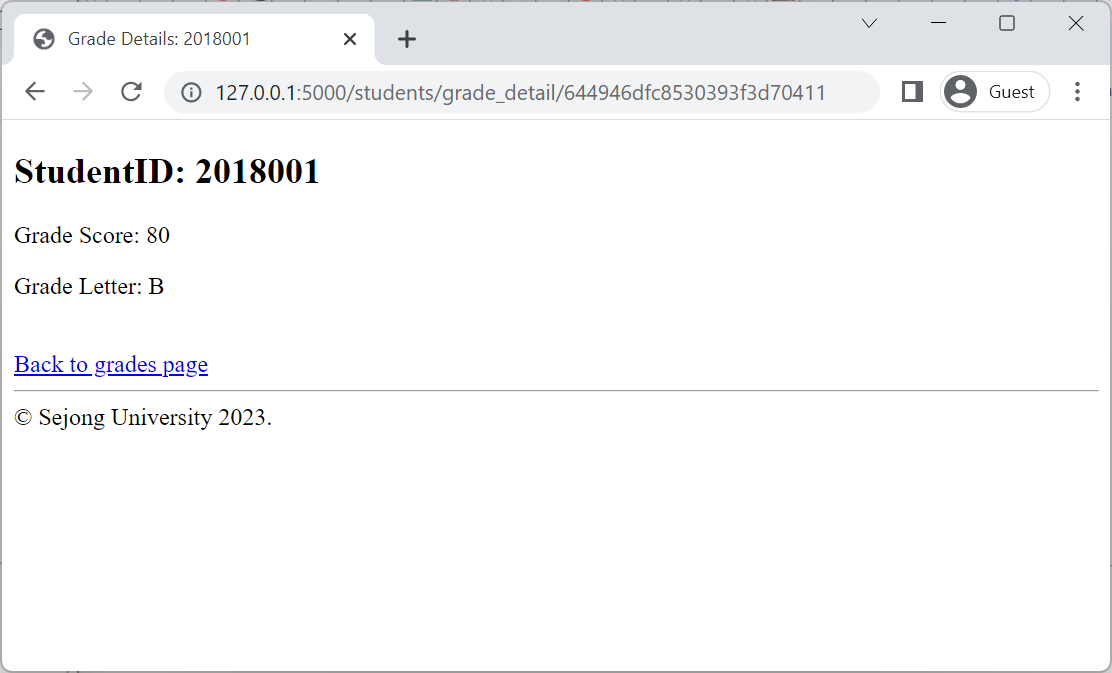

# Deadline is next Tuesday, 07 May 2024 at 10:00 AM Korea time.

Zip all the files and upload it to eCampus `Week9`.

Please don't hesitate to contact me `udin@sju.ac.kr` if you have any questions and enjoy learning :)